# Instagram reach and impressions analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset and data cleaning

In [2]:
df=pd.read_csv("Instagram_data.csv", encoding='latin1')
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [3]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [4]:
rows=len(df.axes[0])
cols=len(df.axes[1])

print('Rows= ',rows,' Cols= ',cols)

Rows=  119  Cols=  13


In [5]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 13.0+ KB


### Visualtizations for impressions

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


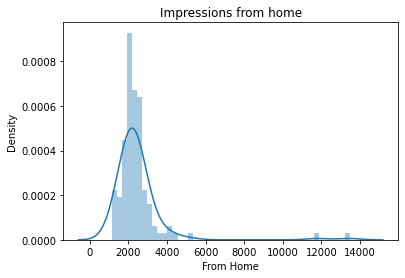

<Figure size 720x576 with 0 Axes>

In [8]:
import seaborn as sns
sns.distplot(df['From Home'])
plt.title('Impressions from home')
plt.figure(figsize=(10,8))
plt.show()

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


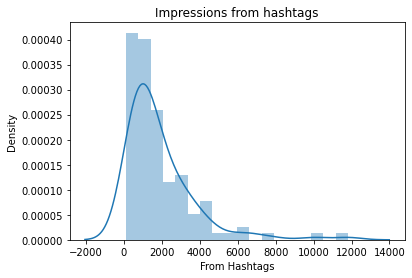

<Figure size 720x576 with 0 Axes>

In [9]:
sns.distplot(df['From Hashtags'])
plt.title('Impressions from hashtags')
plt.figure(figsize=(10,8))
plt.show()

In [10]:
sns.distplot(df['From Explore'])
plt.title('Impressions from explore')
plt.figure(figsize=(10,8))
plt.show()

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x576 with 0 Axes>

In [11]:
sns.distplot(df['From Other'])
plt.title('Impressions from other')
plt.figure(figsize=(10,8))
plt.show()

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x576 with 0 Axes>

In [12]:
import plotly.express as px

total=df['From Home'].sum()+df['From Hashtags'].sum()+df['From Explore'].sum()+df['From Other'].sum()
home=df['From Home'].sum()/total
explore=df['From Explore'].sum()/total
hashtag=df['From Hashtags'].sum()/total
other=df['From Other'].sum()/total

labels = ['From Home','From Hashtags','From Explore','Other']
values=[home,hashtag,explore,other]

px.pie(df,values=values,names=labels, title='Impressions of posts')

In [13]:
# pip install wordcloud

### Determining which are the frequently used words

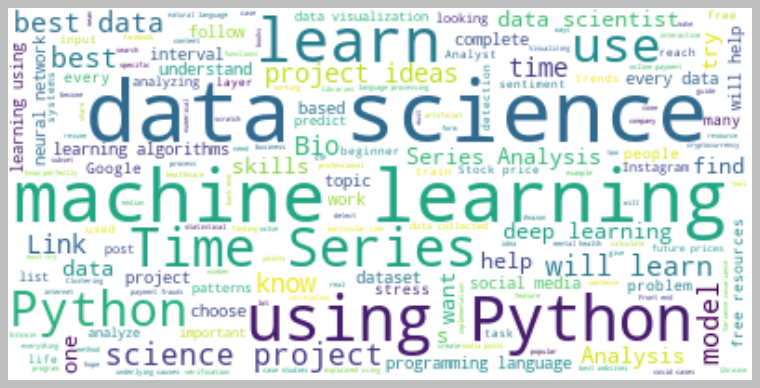

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Relationship between likes, comments and shares with impressions

In [16]:
import matplotlib.pyplot as plt
fig=px.scatter(df, x='Impressions',y='Likes',trendline='ols', title='Likes and Impressions')
fig.show()

In [17]:
fig2=px.scatter(df, x='Impressions',y='Comments',trendline='ols', title='Comments and Impressions')
fig2.show()

In [18]:
fig3=px.scatter(df, x='Impressions',y='Shares',trendline='ols', title='Shares and Impressions')
fig3.show()

In [19]:
fig4=px.scatter(df, x='Impressions',y='Saves',trendline='ols', title='Saves and Impressions')
fig4.show()

### Correlation matrix 

In [20]:
df.corr()

Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Home         0.555666  0.768817  0.012716  0.674985  0.698330   
From Hashtags     0.229623  0.305929  0.161439  0.219511  0.662124   
From Explore      0.495685  0.747803 -0.158565  0.615731  0.653699   
From Other        1.000000  0.331907 -0.108703  0.156834  0.393510   
Saves             0.331907  1.000000 -0.026912  0.860324  0.845643   
Comments         -0.108703 -0.026912  1.000000  0.016933  0.123586   
Shares            0.156834  0.860324  0.016933  1.000000  0.707794   
Likes             0.393510  0.845643  0.123586  0.707794  1.000000   
Profile Visits    0.633080  0.360628  0.096714  0.245361  0.626107   
Follows           0.546737  0.628461 -0.060631  0.493070  0.746333   

                Profile Visits   Follows  
Impressions           0.760981  0.889363  
From Home             0.531076  0.672675  
From Hashtags         0.691345  0.555485  
From Explore          0.531850  0.796019  
From Other            0.633080  0.546737  
Saves                 0.360628  0.628461  
Comments              0.096714 -0.060631  
Shares                0.245361  0.493070  
Likes                 0.626107  0.746333  
Profile Visits        1.000000  0.853152  
Follows               0.853152  1.000000

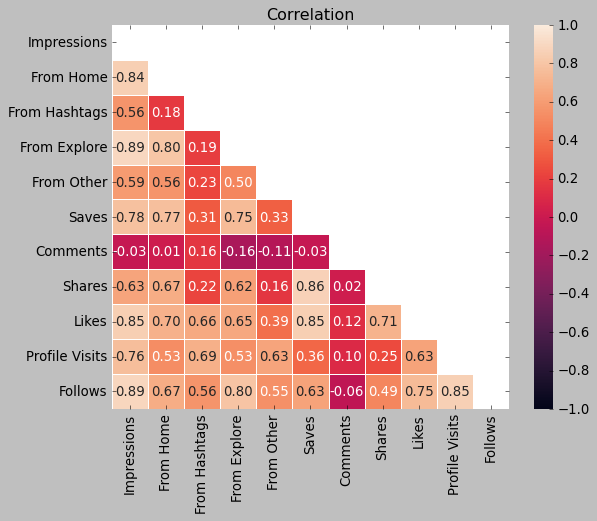

In [21]:
corr_mat=df.corr()
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_mat[mask] = np.nan
fig, ax = plt.subplots()
sns.heatmap(corr_mat,vmin=-1,vmax=1,annot=True, linewidth=.5, fmt='.2f',ax=ax)
plt.title('Correlation')
plt.show() 

In [22]:
print(corr_mat['Impressions'].sort_values(ascending=False))

From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Impressions            NaN
Name: Impressions, dtype: float64


### Predicting impressions using linear regression

In [23]:
X=df.iloc[:,1:11]
y=df.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

compare=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
compare

y_test        y_pred
99     5409   6117.304906
34     6108   6154.069165
98     3015   3034.317402
100    5323   5235.680428
14     9453   9489.498926
85     6168   6160.840891
110    5563   5462.234258
5      3884   3720.310388
115    5731   5731.676956
39     1941   2016.035713
15     5055   4863.159809
20     2064   2043.616065
101    8001   7881.070555
102    4150   4303.457707
38     2191   2266.293904
57     3388   3368.502521
111    4842   4801.105708
3      4528   4451.592804
49    10386  10411.704551
53     6432   6435.007156
116    4139   4167.007339
1      5394   5942.816855
23     3052   3100.090626
44     3786   3845.551386
75     3623   3654.612364
31     3854   3882.591801
103    4609   4464.534591
82     5055   4863.159809
51     7018   7784.013456
18     6168   6160.840891
73     5542   5449.485792
25     4082   4127.048744
28     3924   3983.513162
0      3920   4391.909596
61     6339   6401.299075
12     4344   4254.260890

In [25]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", sm.explained_variance_score(y_test, y_pred)) 
print("R2 score =", sm.r2_score(y_test, y_pred))

Mean absolute error = 129.07
Mean squared error = 51335.62
Median absolute error = 60.93
Explain variance score = 0.9853257606794142
R2 score = 0.9844466306632582


In [26]:
features = np.array([[2586,1028,619,56,282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4312.94670988])

#### Higher the variance and R2 scores, better the model